In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [52]:
X=df['age'].values.reshape(-1,1)  
y = df['bought_insurance']

from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,train_size=0.8,random_state=10)

**Linear Regression**

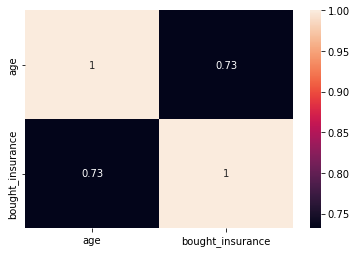

In [27]:
sns.heatmap(df.corr(),annot=True)

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xtrain,ytrain)
y_predict = lr.predict(Xtest)
df1 = pd.DataFrame({'Actual':ytest,'Predicted':y_predict})
df1

 

,Actual,Predicted
7,1,0.982661
5,1,0.896945
18,0,0.104072
21,0,0.254075
11,0,0.296933
1,0,0.232646


In [32]:
from sklearn.metrics import mean_squared_error,r2_score
ypredict = lr.predict(np.array([[5]]))
ypredict



array([-0.19593368])

Text(0, 0.5, 'bought_insurance')

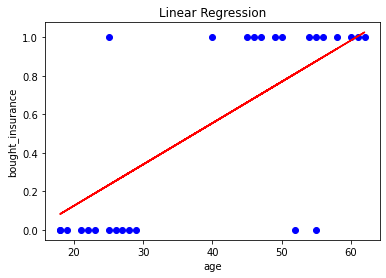

In [33]:
#Visualization  the Linear Regression results
plt.scatter(X,y,color='blue')
plt.plot(X,lr.predict(X),color='red')
plt.title('Linear Regression')
plt.xlabel('age')
plt.ylabel('bought_insurance')

**Decision Tree**

In [54]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X,y)


DecisionTreeClassifier()

In [55]:
model.score(X,y)

0.9259259259259259

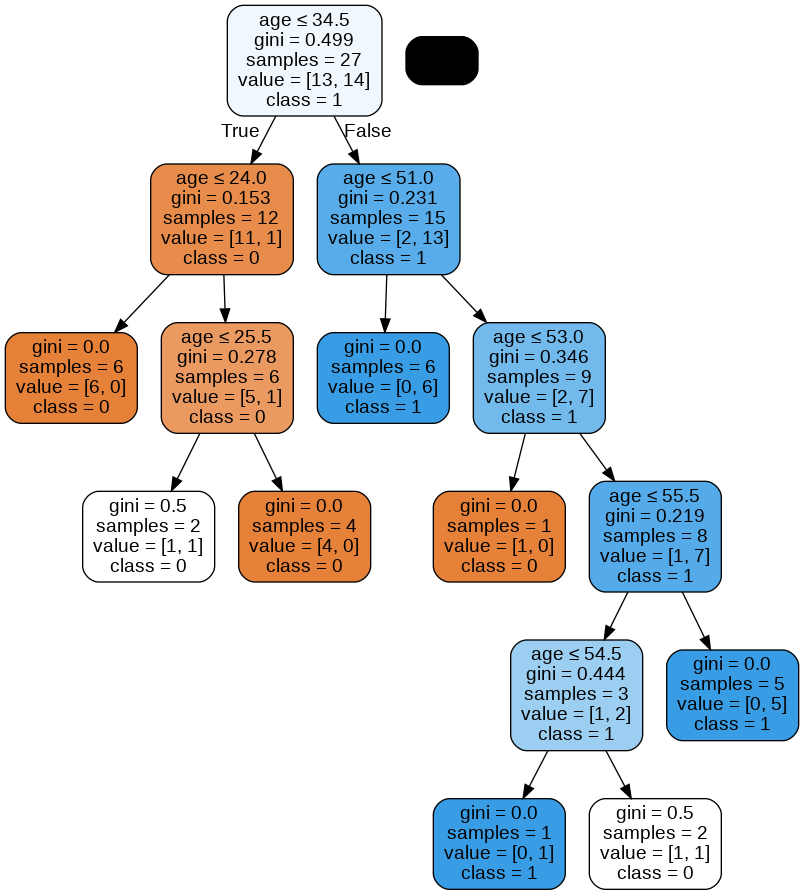

In [56]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['age'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('salaries.png')
Image(graph.create_png())

**Multiple Regression**

In [57]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xtrain,ytrain)
y_predict = lr.predict(Xtest)
df1 = pd.DataFrame({'Actual':ytest,'Predicted':y_predict})
df1

,Actual,Predicted
7,1,0.982661
5,1,0.896945
18,0,0.104072
21,0,0.254075
11,0,0.296933
1,0,0.232646


In [58]:
print(lr.coef_)
y_pred=lr.predict(X)
y_pred

[0.021429]


array([0.1683593 , 0.2326463 , 0.70408428, 0.81122927, 0.68265528,
       0.89694527, 0.87551627, 0.98266127, 1.02551926, 1.00409027,
       0.08264331, 0.2969333 , 0.2755043 , 0.3183623 , 0.74694228,
       0.87551627, 0.2326463 , 0.93980327, 0.10407231, 0.08264331,
       0.14693031, 0.2540753 , 0.55408129, 0.66122628, 0.76837128,
       0.85408727, 0.1897883 ])

In [59]:
y_pred=lr.predict(X)
y_pred

array([0.1683593 , 0.2326463 , 0.70408428, 0.81122927, 0.68265528,
       0.89694527, 0.87551627, 0.98266127, 1.02551926, 1.00409027,
       0.08264331, 0.2969333 , 0.2755043 , 0.3183623 , 0.74694228,
       0.87551627, 0.2326463 , 0.93980327, 0.10407231, 0.08264331,
       0.14693031, 0.2540753 , 0.55408129, 0.66122628, 0.76837128,
       0.85408727, 0.1897883 ])

Text(0.5, 1.0, 'Linear Regression')

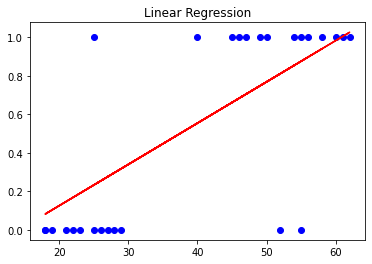

In [60]:
#Visualization  the Linear Regression results
plt.scatter(X,y,color='blue')
plt.plot(X,lr.predict(X),color='red')
plt.title('Linear Regression')

**Logistic Regression**

In [90]:
from sklearn.linear_model import LogisticRegression

lr.predict(Xtest)
y_predict=lr.predict(Xtest)
y_predict






array([0.98266127, 0.89694527, 0.10407231, 0.2540753 , 0.2969333 ,
       0.2326463 ])

In [91]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_predict)
cm

ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report
classification_report(ytest,y_predict)


**KNN**

In [64]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(Xtrain, ytrain)
y_pred = classifier.predict(Xtest)


In [65]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[4 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [68]:
# Calculating error for K values between 1 and 40
error = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain, ytrain)
    pred_i = knn.predict(Xtest)
    error.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Mean Error')

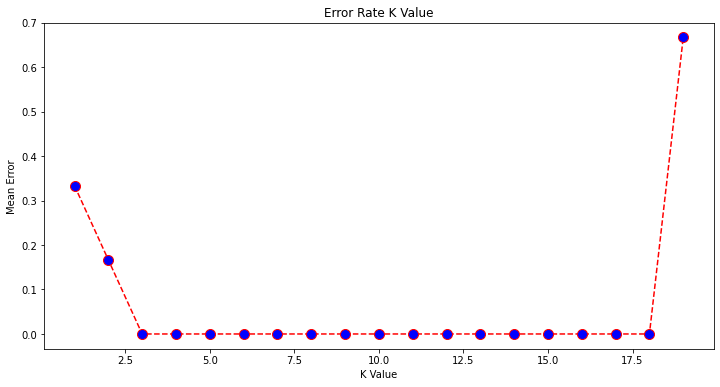

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


**Random Forest**

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(Xtrain, ytrain)
y_pred = rf.predict(Xtest)
y_pred

array([1, 0, 0, 1, 0, 1])

In [74]:
from sklearn.metrics import confusion_matrix
y_pred=rf.predict(X)
c=confusion_matrix(y,y_pred)
c

array([[11,  2],
       [ 2, 12]])

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)


0.8518518518518519

**NaveBays**

In [78]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(Xtrain, ytrain)
y_pred = svclassifier.predict(Xtest)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[4 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



**KMEANS**

In [79]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y = km.fit_predict(X)
df['cluster'] = y
km.cluster_centers_

array([[57.        ],
       [23.41666667],
       [46.16666667]])

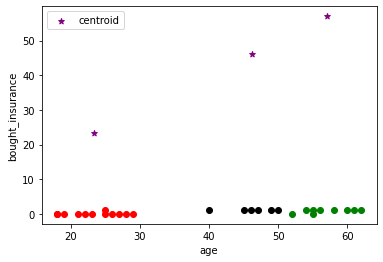

In [87]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.age,df1['bought_insurance'],color='green')
plt.scatter(df2.age,df2['bought_insurance'],color='red')
plt.scatter(df3.age,df3['bought_insurance'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,0],color='purple',marker='*',label='centroid')
plt.xlabel('age')
plt.ylabel('bought_insurance')
plt.legend()

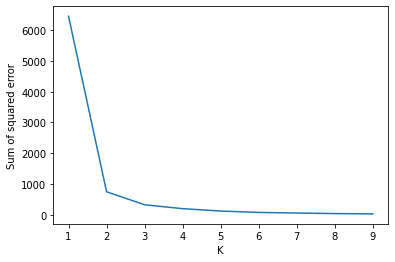

In [88]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['age','bought_insurance']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)